In [3]:
# Neural Net (신경망 모델)
import matplotlib.pyplot as plt
import mglearn

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
!pip install mglearn

     |████████████████████████████████| 542kB 4.9MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.7-py2.py3-none-any.whl size=582705 sha256=5a17a8471c1139b08bb93632d3e33be1483341ef96c2f0a6181902a8c4f25fc9
  Stored in directory: /root/.cache/pip/wheels/74/cf/8d/04f4932d15854a36726c6210763c7127e62de28f5c8ddfcf3b
Successfully built mglearn


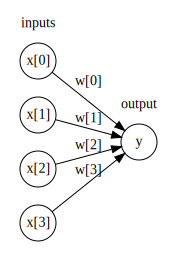

In [4]:
display(mglearn.plots.plot_logistic_regression_graph())

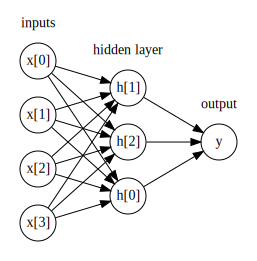

In [7]:
display(mglearn.plots.plot_single_hidden_layer_graph())

In [0]:
## titanic 문제의 output 노드는 1개 (0과1로 나뉘는 범주형은 0이나 1로 수렴시킴)

# **비선형, 활성화  함수 Relu, tanh(하이퍼블릭 탄젠트)**



*   ReLU함수는 0 이하를 자른다.
*   tanh 함수는 낮은 입력값에 대해 -1로 수렴, 큰 입력값에 대해 +1로 수렴
*   sigmoid 함수는 낮은 입력값에 대해 0으로 수렴, 큰 입력값에 대해 1로 수렴



In [0]:
import numpy as np

In [10]:
x = np.linspace(-5, 5, 300) # -5 ~ 5 균일간격의 값으로 300개

## step function
## 0보다 작으면 0, 크면 1

step_fnc = x.copy()
step_fnc[step_fnc <= 0] = 0
step_fnc[step_fnc > 0] = 1
step_fnc

## sigmoid function (초기에 사용된 활성화함수)

sig_fnc = 1/(1+np.exp(-x))
sig_fnc

## relu function
## 0보다 작으면 0, 0보다 크면 비례하게 증가

relu_fnc = np.maximum(x,0)  # 둘을 비교해 큰 값을 내보냄

## tanh function
## 값의 범위가 -1부터 1까지

tanh_fnc = np.tanh(x)
tanh_fnc

array([-0.9999092 , -0.99990292, -0.99989621, -0.99988903, -0.99988135,
       -0.99987315, -0.99986437, -0.99985499, -0.99984496, -0.99983423,
       -0.99982277, -0.99981051, -0.9997974 , -0.99978339, -0.9997684 ,
       -0.99975238, -0.99973526, -0.99971695, -0.99969737, -0.99967644,
       -0.99965406, -0.99963013, -0.99960455, -0.9995772 , -0.99954795,
       -0.99951669, -0.99948327, -0.99944753, -0.99940932, -0.99936847,
       -0.9993248 , -0.99927811, -0.99922819, -0.99917482, -0.99911776,
       -0.99905676, -0.99899154, -0.99892181, -0.99884727, -0.99876758,
       -0.99868238, -0.99859129, -0.99849391, -0.99838981, -0.99827852,
       -0.99815954, -0.99803235, -0.99789637, -0.99775101, -0.99759562,
       -0.99742951, -0.99725193, -0.99706211, -0.99685919, -0.99664228,
       -0.99641042, -0.99616258, -0.99589766, -0.99561449, -0.99531182,
       -0.99498832, -0.99464255, -0.994273  , -0.99387803, -0.99345592,
       -0.9930048 , -0.99252269, -0.9920075 , -0.99145696, -0.99

<Figure size 1440x1800 with 0 Axes>

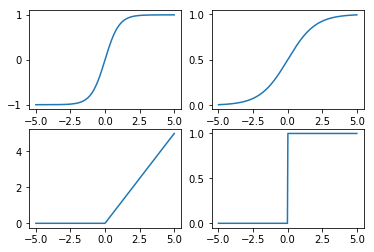

In [22]:
plt.figure(figsize=(20,25))
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2)
ax1.plot(x, tanh_fnc, label='tanh')
ax2.plot(x, sig_fnc, label='sigmoid')
ax3.plot(x, relu_fnc, label='ReLU')
ax4.plot(x, step_fnc, label='step')

Text(0, 0.5, 'relu(x), tanh(x)')

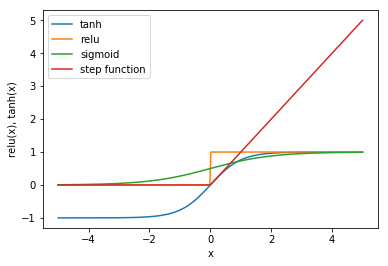

In [23]:
plt.plot(x, tanh_fnc, label='tanh')
plt.plot(x, step_fnc, label='relu')
plt.plot(x, sig_fnc, label='sigmoid')
plt.plot(x, relu_fnc, label='step function')
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('relu(x), tanh(x)')

In [0]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [0]:
X, y = make_moons(n_samples = 100, noise=0.25, random_state=3)
x_train, x_test, y_train, y_test = train_test_split(X,y,
                                                   stratify=y,
                                                   random_state=42)

In [20]:
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(x_train,y_train)
mlp

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

Text(0, 0.5, '특성 1')

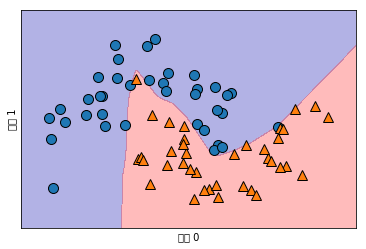

In [24]:
# 은닉 유닛이 100개인 신경망 학습

mglearn.plots.plot_2d_separator(mlp, x_train, fill=True, alpha=.3)
mglearn.discrete_scatter(x_train[:,0], x_train[:,1], y_train)
plt.xlabel('특성 0')
plt.ylabel('특성 1')

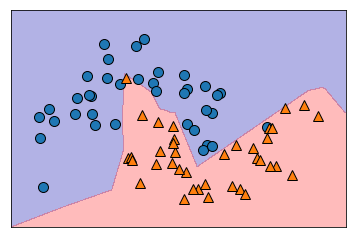

In [26]:
# 10개의 유닛, 두 개의 은닉층

mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes = [10,10])
mlp.fit(x_train,y_train)

mglearn.plots.plot_2d_separator(mlp, x_train, fill=True, alpha=.3)
mglearn.discrete_scatter(x_train[:,0], x_train[:,1], y_train)

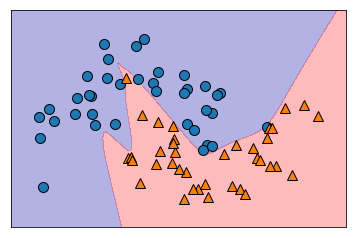

In [27]:
# tanh함수 적용, 10개 유닛, 두 개의 은닉층

mlp = MLPClassifier(solver='lbfgs', random_state=0, 
                    activation='tanh',hidden_layer_sizes = [10,10])
mlp.fit(x_train,y_train)

mglearn.plots.plot_2d_separator(mlp, x_train, fill=True, alpha=.3)
mglearn.discrete_scatter(x_train[:,0], x_train[:,1], y_train)